In [32]:
import chess
import chess.engine
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import math
import numpy as np
import random
from collections import deque

In [33]:
class Agent:

    def __init__(self):
        self.memory=[]
        self.model = self._build_model1()

    def _build_model1(self):
        model1 = Sequential()
        model1.add(Dense(24,input_dim=66,activation='relu'))
        model1.add(Dense(24, activation='relu'))
        model1.add(Dense(1,activation='linear'))
        model1.compile(loss='mse',optimizer = Adam(learning_rate = 0.1))
        return(model1)
    
    def postonum(self,p):
        cols={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7}
        n=cols[p[0]]+8*(int(p[1])-1)
        return(n)

    def action(self,bl,legal_moves):
        maximum=-999999999
        for i in range(len(legal_moves)):
            s1=self.postonum(str(legal_moves[i])[0:2])
            s2=self.postonum(str(legal_moves[i])[2:4])
            bl_copy=bl[:]+[s1,s2]
            pred=self.model.predict(np.array([bl_copy]))
            if pred>maximum:
                maximum=pred
                best_move=legal_moves[i]
                
        eps=0.1
        rand = random.random()
        if rand<1-eps+eps/(len(legal_moves)+1):
            return(best_move)
        else:
            return(legal_moves[random.randint(0,len(legal_moves)-1)])
        
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, k=batch_size)
        statelist=[]
        targetlist=[]
        for state, reward in minibatch:
            statelist+=[state]
            targetlist+=[reward]
        self.model.fit((np.array(statelist)),np.array(targetlist))


In [34]:
import chess.pgn

# Path to the PGN file
pgn_file_path = "/home/ishan/Downloads/MagnusCarlsen-white.pgn"

# Open the PGN file
with open(pgn_file_path, "r") as pgn_file:
    game = chess.pgn.read_game(pgn_file)
    game = chess.pgn.read_game(pgn_file)

# Access game information
print("Event:", game.headers["Event"])
print("White:", game.headers["White"])
print("Black:", game.headers["Black"])
print("Result:", game.headers["Result"])

# Iterate through all moves in the game
board = game.board()
for move in game.mainline_moves():
    board.push(move)
    #print(board)
    #print('-------------')

# Access a specific move (e.g., the 5th move)
move_number = 5
moves = list(game.mainline_moves())
if move_number <= len(moves):
    print(f"Move {move_number}:", moves[move_number-1])
else:
    print(f"Move {move_number} does not exist in this game.")


Event: Live Chess
White: MagnusCarlsen
Black: Chigorinetz
Result: 1-0
Move 5: e2e4


In [35]:
def boardlist(board):
    board_list=[]
    for r in range(0,8):
        for c in range(0,8):
                    sq=r*8+c
                    if str(board.piece_at(sq))=='K':
                      piece=9999
                    elif str(board.piece_at(sq))=='k':
                      piece=-9999
                    elif str(board.piece_at(sq))=='Q':
                      piece=90
                    elif str(board.piece_at(sq))=='q':
                      piece=-90
                    elif str(board.piece_at(sq))=='R':
                      piece=50
                    elif str(board.piece_at(sq))=='r':
                      piece=-50
                    elif str(board.piece_at(sq))=='B':
                      piece=30
                    elif str(board.piece_at(sq))=='b':
                      piece=-30
                    elif str(board.piece_at(sq))=='N':
                      piece=30
                    elif str(board.piece_at(sq))=='n':
                      piece=-30
                    elif str(board.piece_at(sq))=='P':
                      piece=10
                    elif str(board.piece_at(sq))=='p':
                      piece=-10
                    else:
                      piece=0

                    board_list+=[piece]
    return(board_list)

In [36]:
#Creating the board dataset
'''
import chess.pgn

# Path to the PGN file
pgn_file_path = "/home/ishan/Downloads/MagnusCarlsen-white.pgn"

# Open the PGN file
board_pos=[]
moves=[]
with open(pgn_file_path, "r") as pgn_file:
    for i in range(1):
        
        game = chess.pgn.read_game(pgn_file)
        # Access game information
        #print("Event:", game.headers["Event"])
        #print("White:", game.headers["White"])
        #print("Black:", game.headers["Black"])
        #print("Result:", game.headers["Result"])

        # Iterate through all moves in the game
        board = game.board()
        c=0
        for move in game.mainline_moves():
            if c%2==0:
                board_pos+=[board]
                moves+=[move]
            board.push(move)
    board_poslist=[boardlist(x) for x in board_pos]
    
'''

'\nimport chess.pgn\n\n# Path to the PGN file\npgn_file_path = "/home/ishan/Downloads/MagnusCarlsen-white.pgn"\n\n# Open the PGN file\nboard_pos=[]\nmoves=[]\nwith open(pgn_file_path, "r") as pgn_file:\n    for i in range(1):\n        \n        game = chess.pgn.read_game(pgn_file)\n        # Access game information\n        #print("Event:", game.headers["Event"])\n        #print("White:", game.headers["White"])\n        #print("Black:", game.headers["Black"])\n        #print("Result:", game.headers["Result"])\n\n        # Iterate through all moves in the game\n        board = game.board()\n        c=0\n        for move in game.mainline_moves():\n            if c%2==0:\n                board_pos+=[board]\n                moves+=[move]\n            board.push(move)\n    board_poslist=[boardlist(x) for x in board_pos]\n    \n'

In [37]:
import chess.pgn

# Path to the PGN file
pgn_file_path = "/home/ishan/Downloads/MagnusCarlsen-white.pgn"

# Open the PGN file
board_pos = []
moves = []

with open(pgn_file_path, "r") as pgn_file:
    while True:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break
        
        board = game.board()
        c = 0
        for move in game.mainline_moves():
            if c % 2 == 0:
                board_pos.append(board.copy())  # Use board.copy() to preserve the state
                moves.append(move)
            board.push(move)
            c += 1

board_poslist=[boardlist(x) for x in board_pos]

In [38]:
def numtopos(n):
    vals={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h'}
    col=vals[n%8]
    row=n//8+1
    row=str(row)
    return(col+row)

def postonum(p):
    cols={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7}
    n=cols[p[0]]+8*(int(p[1])-1)
    return(n)

In [46]:
episodes = 10
agent = Agent()
model = agent.model
batch_size = 5  # Ensure batch_size is defined
Y=[]
rand=[random.randint(0,10000) for x in range(5)]
test=[board_pos[t] for t in rand]
movtest=[moves[t] for t in rand]
rval=random.randint(0,10000)
tb=board_poslist[rval]
tmove=moves[rval]
ts1 = agent.postonum(str(tmove)[0:2])
ts2 = agent.postonum(str(tmove)[2:4])
train=board_pos[60:120]
rewtrain=moves[60:120]
for i in range(episodes):
    val = 0
    for p in range(len(train)):
        board = train[p]
        bl = boardlist(board)
        legal_moves = list(board.legal_moves)
        act = agent.action(bl, legal_moves)
        s1 = agent.postonum(str(act)[0:2])
        s2 = agent.postonum(str(act)[2:4])
        if act == rewtrain[p]:
            val = 1
        else:
            val = 0

        agent.memory.append((bl + [s1, s2], val))
    agent.replay(batch_size)
    sum=agent.model.predict(np.array([tb+[ts1,ts2]]))
    Y+=[sum]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [47]:
sum=0
ms=[]
mos=[]
for i in range(5):
    t=random.randint(0,1000)
    m=agent.action(boardlist(board_pos[t]),list(board_pos[t].legal_moves))
    ms+=[m]
    mos+=[moves[t]]
    if m==moves[t]:
        print("Yes")
        sum+=1
    else:
        print("Nope")
print(sum)
print(ms)
print(moves[0:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

In [ ]:
agent.action(bl, legal_moves)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

Move.from_uci('c4e6')

In [59]:
y=[x[0][0] for x in Y]
rval

Move.from_uci('c2c4')

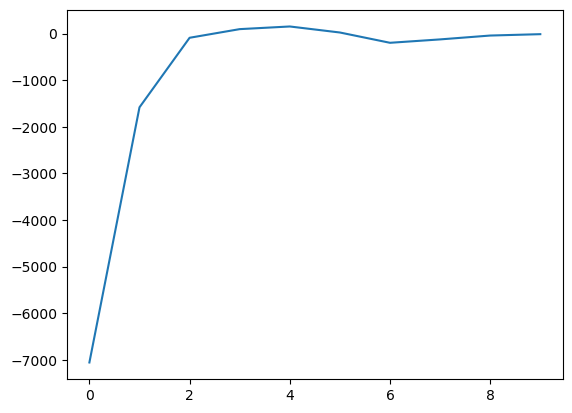

In [57]:
import matplotlib.pyplot as plt
plt.plot(range(len(Y)),y)
plt.show()